In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import warnings
warnings.filterwarnings('ignore')
import os
import re

In [5]:
# assign directory
directory="C:/Users/kaush/OneDrive/Desktop/pephlogy Project/1996-20210928T031439Z-001/1996/Individual AC Data"
res = pd.DataFrame(columns=['AC_Name','# #','Position','Name','Votes','Votes %','Party'])

# iterate over files in that directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    name, extension = os.path.splitext(f)
    # checking if it is a file
    if os.path.isfile(f):
        df = pd.read_excel(f, sheet_name = 0, skiprows = 0)
        df['AC_Name'] = filename.split('.')[0]
        res = res.append(df)
        
res = res.reset_index()

In [6]:
res.head()

index    AC_Name # # Position        Name   Votes Votes %  \
0      0  Afzalgarh   1        4        Anil   3,620    1.9%   
1      1  Afzalgarh   2        9      Bhurey     217    0.1%   
2      2  Afzalgarh   3        8    Bijendra     245    0.1%   
3      3  Afzalgarh   4        2  Hussain A.  60,139   31.7%   
4      4  Afzalgarh   5        1   Indra Dev  64,974   34.2%   

                            Party AC Name  AC No. Type Winning Candidate  \
0                     Independent     NaN     NaN  NaN               NaN   
1                     Independent     NaN     NaN  NaN               NaN   
2  Indian Bahujan Samajwadi Party     NaN     NaN  NaN               NaN   
3             Bahujan Samaj Party     NaN     NaN  NaN               NaN   
4           Bharatiya Janta Party     NaN     NaN  NaN               NaN   

  Total Electors Total Votes Poll% Margin Margin %  
0            NaN         NaN   NaN    NaN      NaN  
1            NaN         NaN   NaN    NaN      NaN  
2            NaN         NaN   NaN    NaN      NaN  
3            NaN         NaN   NaN    NaN      NaN  
4            NaN         NaN   NaN    NaN      NaN

In [19]:
res.drop(res.columns[[2]],axis=1,inplace=True)

In [11]:
#improper_df = res[res['Party All Party Results'].notnull()]
#improper_df

In [20]:
df = res

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4461 entries, 0 to 4460
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     4461 non-null   int64 
 1   AC_Name   4461 non-null   object
 2   Position  4361 non-null   object
 3   Name      4361 non-null   object
 4   Votes     4361 non-null   object
 5   Votes %   4361 non-null   object
 6   Party     4461 non-null   object
dtypes: int64(1), object(6)
memory usage: 244.1+ KB


In [46]:
df[df['Votes']==pd.NaT]

Empty DataFrame
Columns: [index, AC_Name, Position, Name, Votes, Votes %, Party]
Index: []

In [48]:
df.sort_values('Position',inplace=True)

In [55]:
df.info

index         0
AC_Name       0
Position    100
Name        100
Votes       100
Votes %     100
Party         0
dtype: int64

In [59]:
df.drop(df.index[4361:],0,inplace=True)

In [60]:
df.isnull().sum()

index       0
AC_Name     0
Position    0
Name        0
Votes       0
Votes %     0
Party       0
dtype: int64

In [61]:
df.index

Int64Index([ 949,  532, 3745, 2449,  538, 3722, 2454, 1449, 3721,  550,
            ...
            1085,   88,   74, 1090,   77,   80,   94,   89,   73,   90],
           dtype='int64', length=4361)

In [62]:
for i, row in df.iterrows():
    val = str(df.at[i, 'Votes'])
    if ',' in val:
        df.at[i, 'Votes'] = df.at[i, 'Votes'].replace(',', '')

In [63]:
df['Votes'] = df['Votes'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4361 entries, 949 to 90
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     4361 non-null   int64 
 1   AC_Name   4361 non-null   object
 2   Position  4361 non-null   object
 3   Name      4361 non-null   object
 4   Votes     4361 non-null   int64 
 5   Votes %   4361 non-null   object
 6   Party     4361 non-null   object
dtypes: int64(2), object(5)
memory usage: 432.6+ KB


In [64]:
df_p_1 = df[df['Position']==1.0]
df_p_1

index         AC_Name Position  \
949      10          Charda        1   
532      10        Barsathi        1   
3745     12  Sadullah Nagar        1   
2449      5           Kunda        1   
538       5           Basti        1   
...     ...             ...      ...   
1832      3            Hata        1   
1980      9         Jasrana        1   
2150     11        Karchana        1   
187       1           Aonla        1   
1894      4       Jahanabad        1   

                                          Name  Votes Votes %  \
949                             Shabbeer Ahmad  55012   48.3%   
532                                Vanshnarain  40425   31.9%   
3745                          Ram Pratap Singh  45613   35.0%   
2449  Kunwar Raghuraj Pratap Singh Raja Bhaiya  98700   80.0%   
538                             Jagdambika Pal  51862   37.2%   
...                                        ...    ...     ...   
1832                             Ram Nakshatra  70891   50.5%   
1980                             Ramveer Singh  42121   37.5%   
2150                               Raman Singh  69272   48.8%   
187                            Dharampal Singh  51985   41.6%   
1894                               Qasim Hasan  47941   39.0%   

                                   Party  
949                      Samajwadi Party  
532                  Bahujan Samaj Party  
3745               Bharatiya Janta Party  
2449                         Independent  
538   All India Indira Congress (TIWARI)  
...                                  ...  
1832                          Janata Dal  
1980                     Samajwadi Party  
2150                     Samajwadi Party  
187                Bharatiya Janta Party  
1894                 Bahujan Samaj Party  

[417 rows x 7 columns]

In [65]:
df_p_1['Votes %'] = df_p_1['Votes %'].str.replace("%","")

In [66]:
df_p_1['Votes %'] = df_p_1['Votes %'].astype('float64')
df_p_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 949 to 1894
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     417 non-null    int64  
 1   AC_Name   417 non-null    object 
 2   Position  417 non-null    object 
 3   Name      417 non-null    object 
 4   Votes     417 non-null    int64  
 5   Votes %   417 non-null    float64
 6   Party     417 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 26.1+ KB


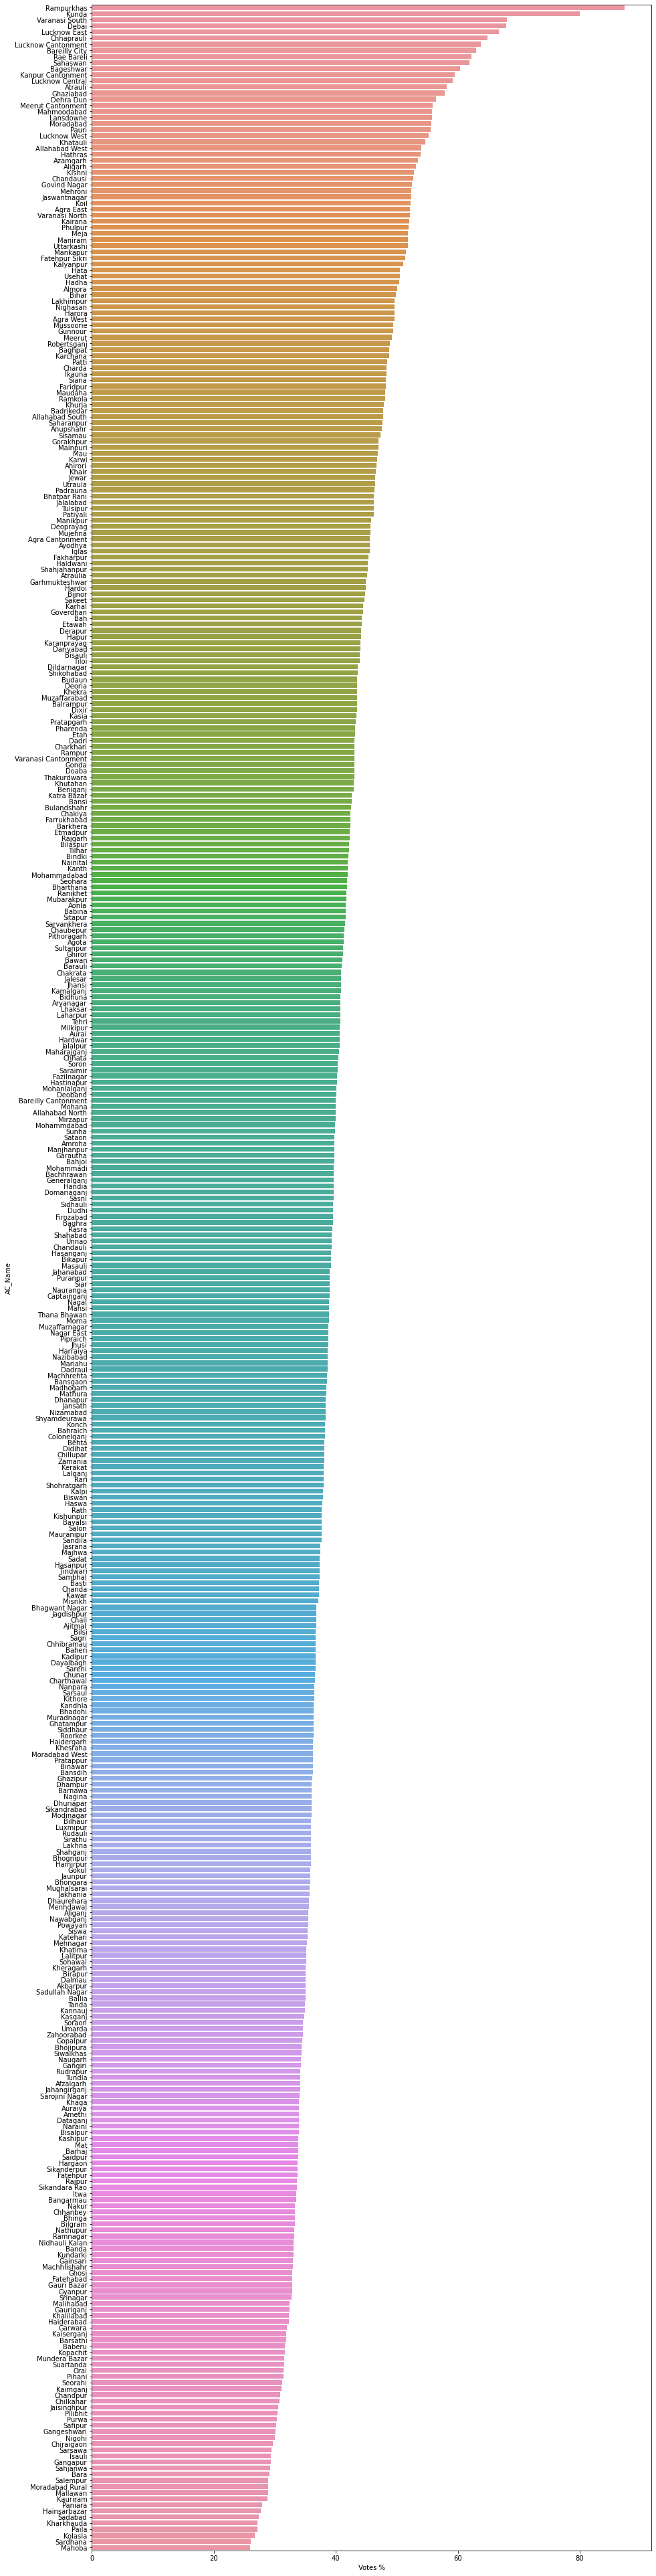

In [67]:
plt.figure(figsize=(15,70))
sns.barplot(x='Votes %', y='AC_Name',data=df_p_1,order=df_p_1.sort_values('Votes %',ascending=False)["AC_Name"],orient="h")
plt.show()

In [68]:
df_c_r = df[(df['Position'] == 1.0) | (df['Position'] == 2.0)]
df_c_r.head()

index         AC_Name Position  \
949      10          Charda        1   
532      10        Barsathi        1   
3745     12  Sadullah Nagar        1   
2449      5           Kunda        1   
538       5           Basti        1   

                                          Name  Votes Votes %  \
949                             Shabbeer Ahmad  55012   48.3%   
532                                Vanshnarain  40425   31.9%   
3745                          Ram Pratap Singh  45613   35.0%   
2449  Kunwar Raghuraj Pratap Singh Raja Bhaiya  98700   80.0%   
538                             Jagdambika Pal  51862   37.2%   

                                   Party  
949                      Samajwadi Party  
532                  Bahujan Samaj Party  
3745               Bharatiya Janta Party  
2449                         Independent  
538   All India Indira Congress (TIWARI)

In [69]:
df_c_r['Votes'] = df_c_r['Votes'].astype('int64')
df_c_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 834 entries, 949 to 3777
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     834 non-null    int64 
 1   AC_Name   834 non-null    object
 2   Position  834 non-null    object
 3   Name      834 non-null    object
 4   Votes     834 non-null    int64 
 5   Votes %   834 non-null    object
 6   Party     834 non-null    object
dtypes: int64(2), object(5)
memory usage: 52.1+ KB


In [70]:
plt.figure(figsize=(12,12))
fig = px.treemap(df_c_r, 
                 path=[px.Constant('all'), 'AC_Name','Party'], 
                 values='Votes',
                 color='Party')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 864x864 with 0 Axes>

In [71]:
df_c_r1 = df_c_r[df_c_r['Position'] == 1.0]
df_c_r1.head()

index         AC_Name Position  \
949      10          Charda        1   
532      10        Barsathi        1   
3745     12  Sadullah Nagar        1   
2449      5           Kunda        1   
538       5           Basti        1   

                                          Name  Votes Votes %  \
949                             Shabbeer Ahmad  55012   48.3%   
532                                Vanshnarain  40425   31.9%   
3745                          Ram Pratap Singh  45613   35.0%   
2449  Kunwar Raghuraj Pratap Singh Raja Bhaiya  98700   80.0%   
538                             Jagdambika Pal  51862   37.2%   

                                   Party  
949                      Samajwadi Party  
532                  Bahujan Samaj Party  
3745               Bharatiya Janta Party  
2449                         Independent  
538   All India Indira Congress (TIWARI)

In [72]:
df_c_r1.sort_values('Votes', ascending=False, inplace=True)
df_c_r1

index       AC_Name Position                                      Name  \
3618      5    Rampurkhas        1                              Promod Kumar   
1540      0     Ghaziabad        1                           Baleshwar Tyagi   
1638      2  Govind Nagar        1                         Bal Chandra Misra   
2449      5         Kunda        1  Kunwar Raghuraj Pratap Singh Raja Bhaiya   
2610      0   Mahmoodabad        1                               Ammar Rizvi   
...     ...           ...      ...                                       ...   
2347      3     Kheragarh        1                         Mandleshwar Singh   
3623      0      Ranikhet        1                                Ajay Bhatt   
1252      5       Didihat        1                              Vishan Singh   
3721     16       Sadabad        1                          Vishambhar Singh   
2619      0        Mahoba        1                           Arimardan Singh   

       Votes Votes %                     Party  
3618  128635   87.4%  Indian National Congress  
1540  110990   57.9%     Bharatiya Janta Party  
1638  103667   52.5%     Bharatiya Janta Party  
2449   98700   80.0%               Independent  
2610   98358   55.8%  Indian National Congress  
...      ...     ...                       ...  
2347   30473   35.1%  Indian National Congress  
3623   30241   41.7%     Bharatiya Janta Party  
1252   29729   38.1%     Bharatiya Janta Party  
3721   29588   27.4%     Bharatiya Janta Party  
2619   27382   25.9%           Samajwadi Party  

[417 rows x 7 columns]

In [73]:
df_c_r1['Party'].value_counts()

Bharatiya Janta Party                 171
Samajwadi Party                       109
Bahujan Samaj Party                    66
Indian National Congress               31
Independent                            13
Bharatiya Kisan Kamgar Party            8
Janata Dal                              7
Communist Party Of India (MARXIST)      4
All India Indira Congress (TIWARI)      4
Social Action Party                     2
Samajwadi Janata Party (RASHTRIYA)      1
Communist Party Of India                1
Name: Party, dtype: int64

In [86]:
df_c_r1.replace({'Party': {'Bharatiya Janta Party': 'BJP',
                           'Samajwadi Party': 'SP',
                           'Bahujan Samaj Party':'BSP',
                           'Apna Dal (Soneylal)':'AD',
                           'Indian National Congress':'INC',
                           'Suheldev Bhartiya Samaj Party':'SBSP',
                           'Independent':'Ind',
                           'Ittehad-E-Millait Council':'IC',
                           'Nirbal Indian Shoshit Hamara Aam Dal':'NISHAD',
                           'Nationalist Congress Party': 'NCP',
                           'Rashtriya Lok Dal':'RLD',
                           'Peace Party' : 'PP',
                           'Quami Ekta Dal': 'QED',
                           'Bharatiya Kisan Kamgar Party':"BKKP",
                           'All India Indira Congress (TIWARI)': "AIICT",
                           "Janata Dal" : 'JD',
                           "Communist Party Of India (MARXIST)" : "CPIM",
                           "Social Action Party":"SAP",
                           "Communist Party Of India":"CPI",
                           "Samajwadi Janata Party (RASHTRIYA)":"SJPR"
                          }},inplace=True)

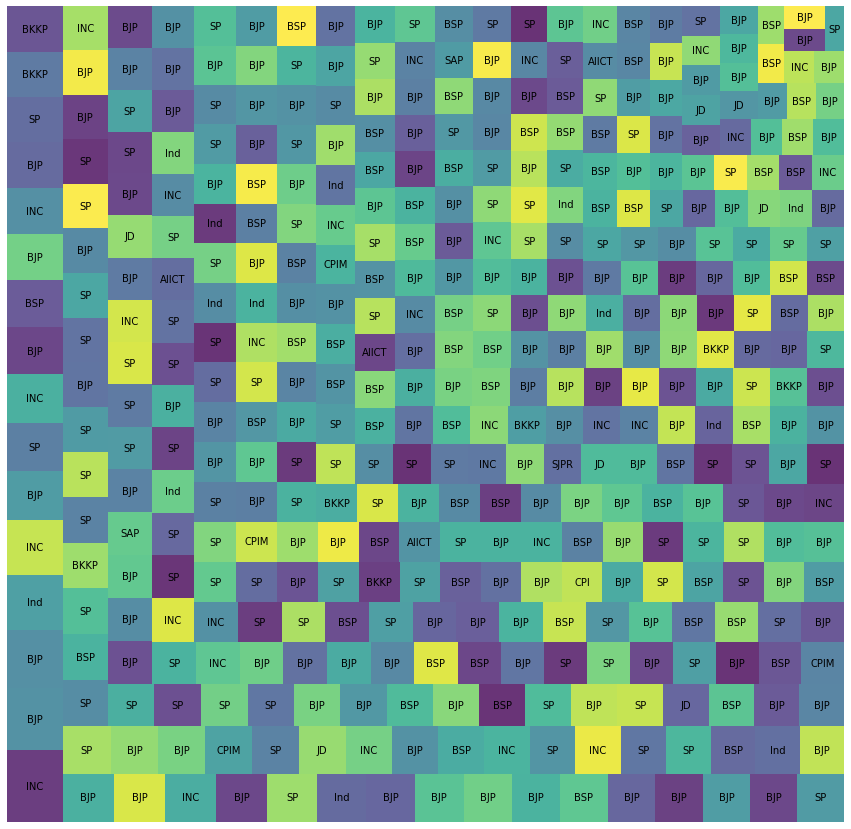

In [87]:
fig, ax = plt.subplots(1, figsize = (15,15))
squarify.plot(sizes=df_c_r1['Votes'], 
              label=df_c_r1['Party'],
              alpha=.8 )
plt.axis('off')
plt.show()

In [88]:
df_final = df[(df['Position'] == 1.0) | (df['Position'] == 2.0)]

In [89]:
df_final.sort_values(['AC_Name', 'Votes'], inplace=True)
df_final['diffs'] = df_final.groupby('AC_Name')['Votes'].diff()
df_final['diffs'] = df_final['diffs'].fillna(value=0)

In [90]:
plt.figure(figsize=(20,20))
fig = px.treemap(df_final, 
                 path=[px.Constant('all'), 'Party','AC_Name'], 
                 values='diffs',
                 color='Party',
                 color_continuous_scale='RdBu')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1440x1440 with 0 Axes>

In [91]:
X = df_final[df_final['diffs'] > 0]['diffs'].unique()
X = X.reshape(-1, 1)

In [92]:
#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 4)
 
#predict the labels of clusters.
label = kmeans.fit_predict(X)
 
print(label)

[1 1 1 3 1 0 1 1 1 0 3 0 0 3 1 1 3 3 1 0 3 3 1 3 0 1 3 1 0 3 3 1 1 3 3 1 1
 1 1 1 1 3 3 1 1 3 0 1 3 3 3 1 1 1 3 3 1 1 1 0 1 1 3 1 3 0 0 3 3 1 1 1 3 1
 1 1 0 3 3 1 1 1 3 3 1 1 0 3 0 3 1 1 1 2 3 1 1 3 1 1 3 3 3 1 3 1 1 2 0 3 3
 3 0 1 3 1 1 1 0 3 3 1 1 1 3 1 3 0 3 1 1 0 1 1 1 1 1 1 1 3 1 1 1 1 3 2 1 1
 1 1 1 1 0 1 2 3 1 3 1 1 1 0 3 1 1 3 3 1 0 1 1 1 3 1 0 0 3 1 1 3 1 3 1 1 3
 3 3 3 1 3 3 1 3 3 3 1 1 3 1 1 0 3 3 1 0 3 3 0 3 0 1 1 1 1 3 3 3 1 1 3 1 1
 0 3 0 1 1 3 3 3 1 1 0 1 1 1 2 1 3 0 1 3 0 1 0 0 0 0 1 1 3 1 1 0 1 3 0 3 1
 1 1 0 3 0 3 1 3 1 0 0 1 3 0 1 3 0 3 1 3 3 3 3 3 3 3 3 0 1 3 1 1 1 1 1 1 0
 0 1 1 1 1 0 3 3 3 3 3 3 1 3 1 3 1 1 1 3 1 1 0 0 0 3 0 1 3 3 3 1 1 3 1 1 2
 0 1 0 1 3 2 1 1 3 1 0 1 1 1 1 1 1 1 3 1 2 1 1 3 1 1 3 1 1 1 1 1 3 1 3 1 3
 3 1 3 1 3 1 3 3 1 3 1 1 1 3 1 1 3 3 1 1 1 1 1 1 1 1 1 1 3 0 1 1 3 1 3 1 1
 3 1 3 0 0 3 0 1 1]


In [93]:
df1 = pd.DataFrame(X)
df1['label'] = label
df1.rename(columns={0: 'diffs'}, inplace=True)

No handles with labels found to put in legend.


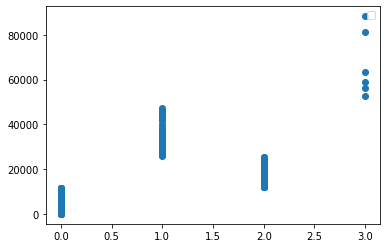

In [429]:
plt.scatter(df1['label'], df1['diffs'])
plt.legend()
plt.show()

In [94]:
df_res = pd.merge(df1, df_final, how='left', on='diffs')

In [95]:
df_res.shape

(417, 9)

In [433]:
df_res['label'] = df_res.label.map({1.0:'Safe',
                3.0:'Safe',
                2.0:'Favorable',
                0.0:'Battle-Ground'})
df_res

diffs          label  index         AC_Name Position  \
0     6415.0  Battle-Ground      6      Agra Cantt        1   
1    23356.0      Favorable      6      Agra North        1   
2    18754.0      Favorable      5      Agra Rural        1   
3    22960.0      Favorable     13      Agra South        1   
4     2083.0  Battle-Ground     19         Ajagara        1   
..       ...            ...    ...             ...      ...   
398  13822.0      Favorable     10  Varanasi South        1   
399   5417.0  Battle-Ground     16        Zafrabad        1   
400  10478.0  Battle-Ground     11      Zahoorabad        1   
401  23041.0      Favorable      6         Zaidpur        1   
402  29440.0           Safe      8         Zamania        1   

                              Name  Votes Votes %                  Party  
0              Gutiyari Lal Duwesh  67786   32.5%    Bahujan Samaj Party  
1                Jagan Prasad Garg  68401   34.8%  Bharatiya Janta Party  
2                Kali Charan Suman  69969   34.8%    Bahujan Samaj Party  
3               Yogendra Upadhyaya  74324   37.8%  Bharatiya Janta Party  
4                    Tribhuvan Ram  60239   32.3%    Bahujan Samaj Party  
..                             ...    ...     ...                    ...  
398  Shyamdev Roy Chaudhari (Dada)  57868   38.2%  Bharatiya Janta Party  
399        Sachindra Nath Tripathi  59419   30.7%        Samajwadi Party  
400            Syeda Shadab Fatima  67012   33.0%        Samajwadi Party  
401                       Ramgopal  76869   33.8%        Samajwadi Party  
402                      Omprakash  83407   41.5%        Samajwadi Party  

[403 rows x 9 columns]

In [96]:
df_second = df_final[df_final['Position'] == 2]
dict_cols = {'Name':'2_Name', 'Votes':'2_Votes', 'Votes %': '2_Votes %', 'Party':'2_party'}
df_second.rename(columns=dict_cols, inplace=True)
df_second = df_second[['AC_Name', '2_Name', '2_Votes', '2_Votes %', '2_party']].sort_values('AC_Name')
df_second.head()

AC_Name                2_Name  2_Votes 2_Votes %  \
3         Afzalgarh            Hussain A.    60139     31.7%   
12            Agota       Kiran Pal Singh    42258     35.7%   
21  Agra Cantonment    Hazi Islam Kureshi    38933     39.8%   
26        Agra East  Banke Bihari Agerwal    23279     28.5%   
34        Agra West     Harikrishn Pipple    41735     44.4%   

                         2_party  
3            Bahujan Samaj Party  
12  Bharatiya Kisan Kamgar Party  
21           Bahujan Samaj Party  
26      Indian National Congress  
34           Bahujan Samaj Party

In [97]:
df_res = df_res.sort_values('AC_Name')
df_res.head()

diffs  label  index          AC_Name Position                   Name  \
0   4835.0      1      4        Afzalgarh        1              Indra Dev   
1   6730.0      1      7            Agota        1  Virendra Singh Sirohi   
2   5623.0      1      5  Agra Cantonment        1            Kesho Mehra   
3  19254.0      3      5        Agra East        1    Satya Prakash Vikal   
4   4923.0      1      3        Agra West        1         Ram Babu Harit   

   Votes Votes %                  Party  
0  64974   34.2%  Bharatiya Janta Party  
1  48988   41.3%  Bharatiya Janta Party  
2  44556   45.6%  Bharatiya Janta Party  
3  42533   52.1%  Bharatiya Janta Party  
4  46658   49.6%  Bharatiya Janta Party

In [98]:
df_res.shape # (407, 9)
df_second.shape # (403, 5)

(417, 5)

In [99]:
df_res = pd.merge(df_res, df_second, how='inner', on='AC_Name')

In [102]:
df_res.to_excel('1996_Analysis_1.xlsx')

In [101]:
plt.figure(figsize=(20,20))
fig = px.treemap(df_res, 
                 path=[px.Constant('all'), 'Party','AC_Name','label'], 
                 values='diffs',
                 color='label',
                 color_discrete_map={'Safe':'#BCEE68', 'Favorable':'#00EEEE', 'Battle-Ground':'#EE4000'})
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1440x1440 with 0 Axes>